In [1]:
# !pip install tensorflow

In [2]:
# !pip install tensorflow-gpu

In [3]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import tensorflow_docs as tfdocs
# import tensorflow_docs.modeling
# import tensorflow_docs.plots

print(tf.__version__)

2.4.1


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
print(len(train_labels), pd.Series(train_labels).unique())

60000 [9 0 3 2 7 5 1 6 4 8]


In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
print(len(test_labels), pd.Series(test_labels).unique())

10000 [9 2 1 6 4 5 7 3 8 0]


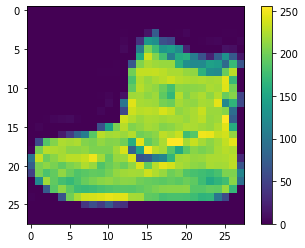

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

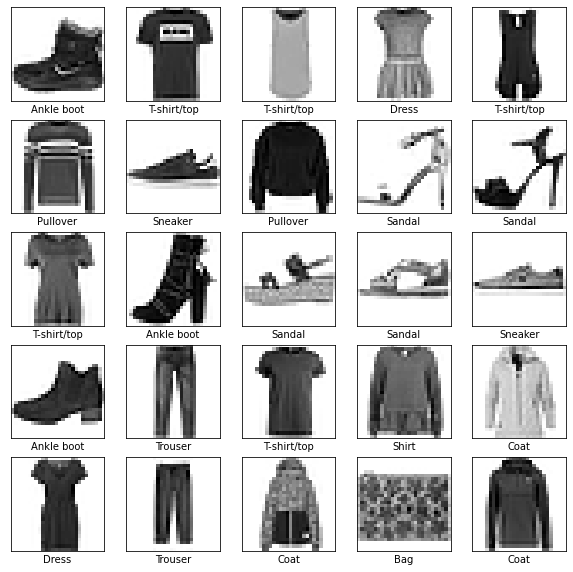

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [422]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

In [423]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [424]:
fit_model = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 1.0403 - accuracy: 0.6891 - val_loss: 0.5024 - val_accuracy: 0.8223
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4834 - accuracy: 0.8317 - val_loss: 0.4339 - val_accuracy: 0.8453
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8500 - val_loss: 0.4047 - val_accuracy: 0.8533
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3936 - accuracy: 0.8620 - val_loss: 0.3863 - val_accuracy: 0.8622
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3714 - accuracy: 0.8682 - val_loss: 0.3791 - val_accuracy: 0.8635
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3537 - accuracy: 0.8736 - val_loss: 0.3648 - val_accuracy: 0.8673
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8748 - val_loss: 0.3629 - val_accuracy: 0.8658
Epoch 

In [425]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3699 - accuracy: 0.8674

Test accuracy: 0.8673999905586243


In [426]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [427]:
predictions = probability_model.predict(test_images)

In [428]:
predictions[0]

array([3.9838455e-05, 8.3049908e-06, 6.8910078e-05, 2.9906281e-05,
       3.4179524e-05, 1.0106606e-01, 2.0182593e-04, 8.2803451e-02,
       1.3080597e-03, 8.1443942e-01], dtype=float32)

In [429]:
np.argmax(predictions[0])

9

In [430]:
test_labels[0]

9

In [431]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

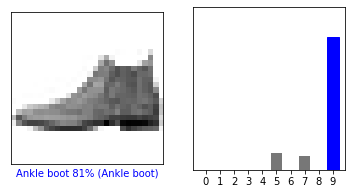

In [432]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

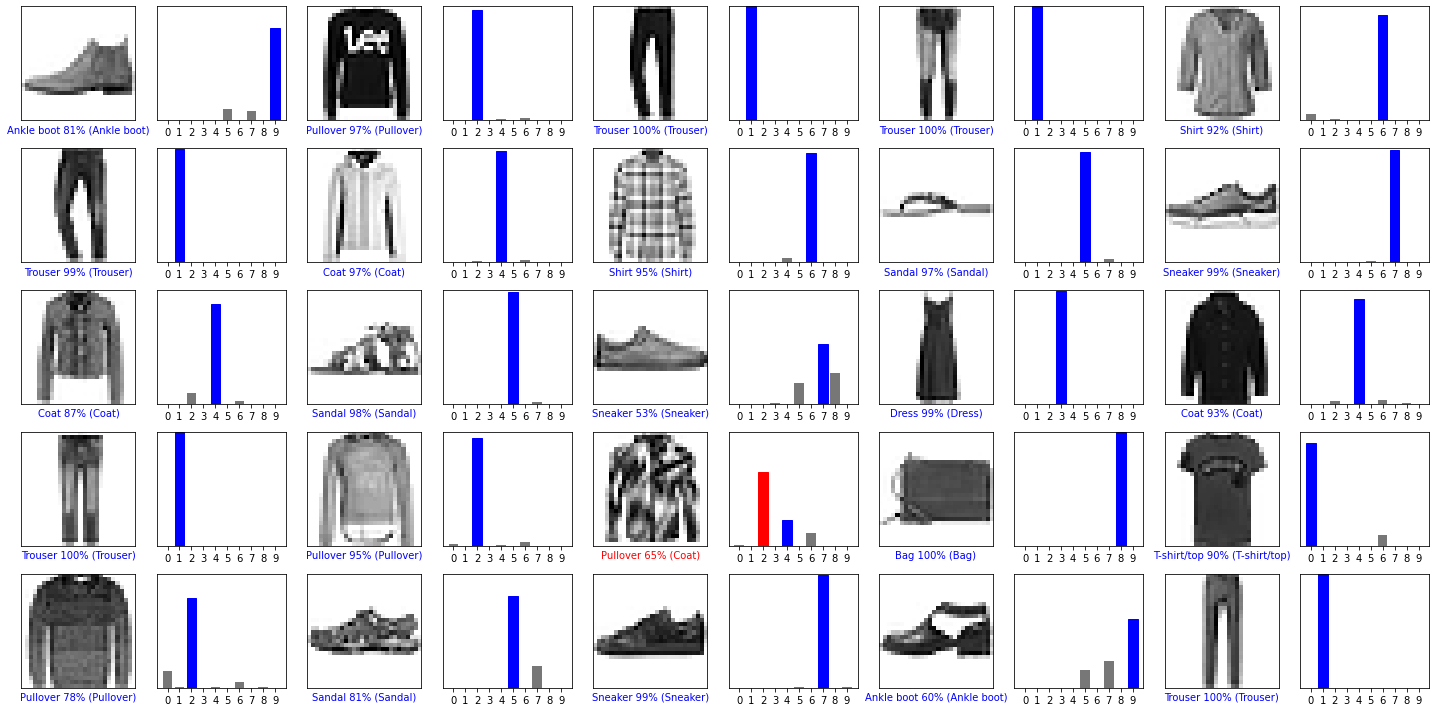

In [439]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
temp_list = []
for i in range(num_images):
#     temp = np.random.randint(0, test_images.shape[0]-1)
    temp = i
    if temp not in temp_list:
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(temp, predictions[temp], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(temp, predictions[temp], test_labels)
        temp_list.append(temp)
plt.tight_layout()
plt.show()


In [440]:
def plot_history(history):
    plt.figure(figsize=(15,15))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.ylim([min(fit_model.history['loss'] + fit_model.history['val_loss']),
              max(fit_model.history['accuracy'] + fit_model.history['val_accuracy'])])
    plt.xlabel('Epoch')
    plt.ylabel('Loss / Accuracy')
    plt.legend()
    plt.grid(True)

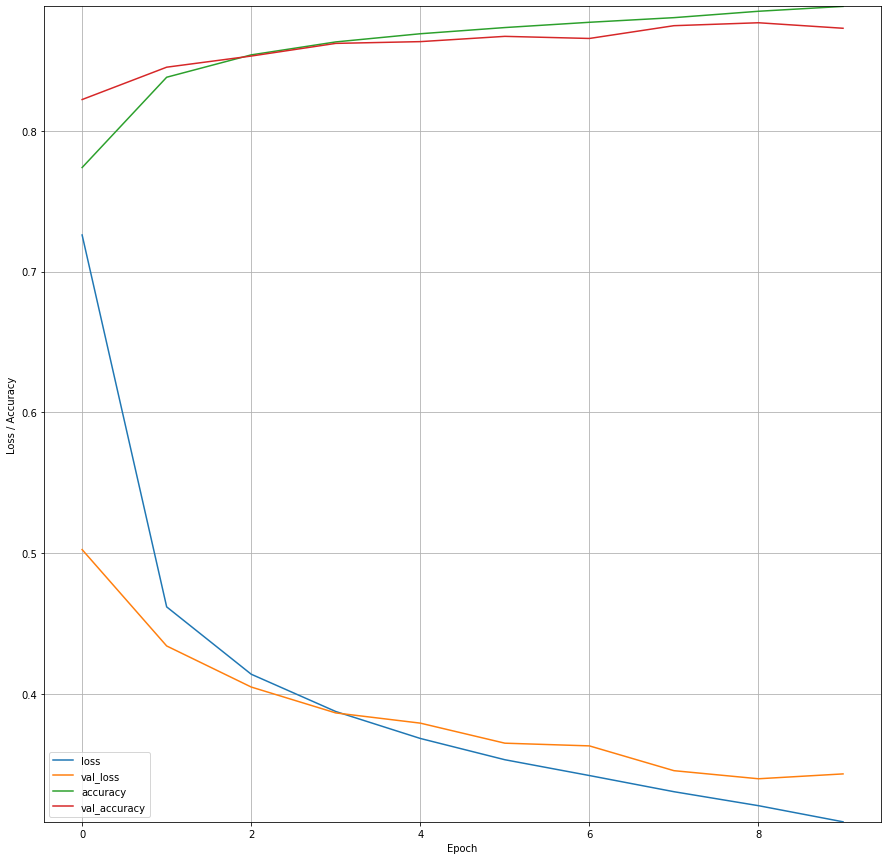

In [441]:
plot_history(fit_model)